<a href="https://www.kaggle.com/code/maushamjha/medical-text?scriptVersionId=104045448" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('../input/biomedical-text-publication-classification/alldata_1_for_kaggle.csv',encoding="latin-1")
                 

In [3]:
data.sample(10)

,Unnamed: 0,0,a
2858,2858,Colon_Cancer,""" exercise has been extensively utilised as a..."
4702,4702,Thyroid_Cancer,"""researchWhat are the implications of using in..."
381,381,Colon_Cancer,gastrointestinal nematodes could release e...
3265,3265,Thyroid_Cancer,""" Innovation Primary liver cancer PLC is a fat..."
2152,2152,Lung_Cancer,""" when only a subset of normal samples are ser..."
4835,4835,Colon_Cancer,""" among eukaryotic anisms alternative splicin..."
1318,1318,Colon_Cancer,recently extensive evidence has clarified ...
1233,1233,Thyroid_Cancer,Signaling pathway analysis methods are commonl...
2737,2737,Thyroid_Cancer,"""Immigrant statusfamily relationsACP contempla..."
2163,2163,Lung_Cancer,""" In the current study how miR-21 interplays w..."


In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
data.rename({'0':'cancer','a':'text'},axis=1,inplace=True)

In [6]:
data.tail()

,cancer,text
7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,Colon_Cancer,"""adipogenesis is the process through which mes..."
7569,Colon_Cancer,the periparturient period is one of the most c...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cancer  7570 non-null   object
 1   text    7570 non-null   object
dtypes: object(2)
memory usage: 118.4+ KB


In [8]:
data.isnull().sum()

cancer    0
text      0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['cancer']=le.fit_transform(data['cancer'])

In [10]:
data.tail()

,cancer,text
7565,0,we report the case of a 24yearold man who pres...
7566,0,among synchronous colorectal cancers scrcs rep...
7567,0,the heterogeneity of cancer cells is generally...
7568,0,"""adipogenesis is the process through which mes..."
7569,0,the periparturient period is one of the most c...


In [11]:
data['cancer'].value_counts()/data['cancer'].count()*100

2    37.120211
0    34.081902
1    28.797886
Name: cancer, dtype: float64

<AxesSubplot:>

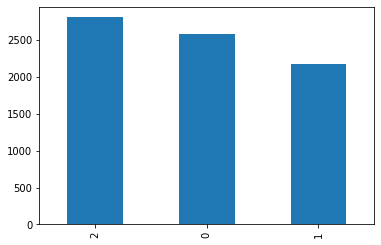

In [12]:
data['cancer'].value_counts().plot(kind='bar')

In [13]:
#without preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer(max_features=3000)
tfidf=TfidfVectorizer(max_features=4600)
x=tfidf.fit_transform(data['text']).toarray()

In [14]:
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0619007 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00345469],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
y=data['cancer'].values

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56,stratify=y)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from xgboost import XGBClassifier
gb=GaussianNB()
mb=MultinomialNB()
bb=BernoulliNB()
def train(model):
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    print(model)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(accuracy_score(y_test,y_predict))

In [17]:
l=[gb,mb,bb]
for model in l:
    train(model)
    

GaussianNB()
[[465   0  51]
 [  0 436   0]
 [ 40   0 522]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       516
           1       1.00      1.00      1.00       436
           2       0.91      0.93      0.92       562

    accuracy                           0.94      1514
   macro avg       0.94      0.94      0.94      1514
weighted avg       0.94      0.94      0.94      1514

0.939894319682959
MultinomialNB()
[[411   2 103]
 [  0 436   0]
 [ 61   0 501]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       516
           1       1.00      1.00      1.00       436
           2       0.83      0.89      0.86       562

    accuracy                           0.89      1514
   macro avg       0.90      0.90      0.90      1514
weighted avg       0.89      0.89      0.89      1514

0.8903566710700133
BernoulliNB()
[[361  11 144]
 [  0 436   0]
 [155   9 398]]
              precis

without doing preprocessing and without removing duplicate values we are getting high accuracy but here is the data leakage problem which causes overfitting. now we will remove duplicates and will see the result


In [18]:
data.duplicated().sum()

6574

In [19]:
data=data.drop_duplicates()
data.size

1992

In [20]:
data.head()

,cancer,text
0,2,Thyroid surgery in children in a single insti...
1,2,""" The adopted strategy was the same as that us..."
2,2,coronary arterybypass grafting thrombosis ï¬b...
3,2,Solitary plasmacytoma SP of the skull is an u...
4,2,This study aimed to investigate serum matrix ...


In [21]:
data['cancer'].value_counts()/data['cancer'].count()*100

1    45.381526
2    28.413655
0    26.204819
Name: cancer, dtype: float64

<AxesSubplot:>

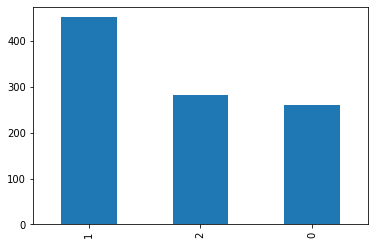

In [22]:
data['cancer'].value_counts().plot(kind='bar')

In [23]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer(max_features=3000)
tfidf=TfidfVectorizer(max_features=1000)
x=tfidf.fit_transform(data['text']).toarray()
y=data['cancer'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56,stratify=y)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gb=GaussianNB()
mb=MultinomialNB()
bb=BernoulliNB()
def train(model):
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    print(model)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(accuracy_score(y_test,y_predict))

In [24]:
l=[gb,mb,bb]
for model in l:
    train(model)
    

GaussianNB()
[[19  0 33]
 [ 0 91  0]
 [16  1 40]]
              precision    recall  f1-score   support

           0       0.54      0.37      0.44        52
           1       0.99      1.00      0.99        91
           2       0.55      0.70      0.62        57

    accuracy                           0.75       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.75      0.75      0.74       200

0.75
MultinomialNB()
[[20  7 25]
 [ 0 91  0]
 [ 8  2 47]]
              precision    recall  f1-score   support

           0       0.71      0.38      0.50        52
           1       0.91      1.00      0.95        91
           2       0.65      0.82      0.73        57

    accuracy                           0.79       200
   macro avg       0.76      0.74      0.73       200
weighted avg       0.79      0.79      0.77       200

0.79
BernoulliNB()
[[39  0 13]
 [ 0 91  0]
 [14  2 41]]
              precision    recall  f1-score   support

           0       

after removing duplicates the above result we have got now we will do text preprocessing and will try  to increase the accuracy

In [25]:
data['text']=data['text'].str.lower()

In [26]:
from nltk import word_tokenize
data['text']=data['text'].apply(lambda x:word_tokenize(x))

In [27]:
def remove_special_char(list):
    y=[]
    for string in list:
        if string.isalnum():
            y.append(string)
    return y

In [28]:
data['text']=data['text'].apply(lambda x:remove_special_char(x))

In [29]:
from nltk.corpus import stopwords
import string

In [30]:
def useful_words(list):
    y=[]
    for text in list:
         if text not in stopwords.words('english') and text not in string.punctuation:
                y.append(text)
    return y

In [31]:
 data['text']=data['text'].apply(lambda x:useful_words(x))

In [32]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [33]:
def stemming(list):
    y=[]
    for text in list:
        y.append(ps.stem(text))
    return y

In [34]:
data['text']=data['text'].apply(lambda x:stemming(x))

In [35]:
data['text']=data['text'].apply(lambda x:" ".join(x))

In [36]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer(max_features=3000)
tfidf=TfidfVectorizer(max_features=965)
x=tfidf.fit_transform(data['text']).toarray()
y=data['cancer'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=56,stratify=y)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gb=GaussianNB()
mb=MultinomialNB()
bb=BernoulliNB()
def train(model):
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    print(model)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(accuracy_score(y_test,y_predict))

In [37]:
l=[gb,mb,bb]
for model in l:
    train(model)

GaussianNB()
[[ 35   0  30]
 [  0 111   2]
 [ 35   0  36]]
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        65
           1       1.00      0.98      0.99       113
           2       0.53      0.51      0.52        71

    accuracy                           0.73       249
   macro avg       0.68      0.68      0.68       249
weighted avg       0.74      0.73      0.73       249

0.7309236947791165
MultinomialNB()
[[ 29   8  28]
 [  0 112   1]
 [ 16   5  50]]
              precision    recall  f1-score   support

           0       0.64      0.45      0.53        65
           1       0.90      0.99      0.94       113
           2       0.63      0.70      0.67        71

    accuracy                           0.77       249
   macro avg       0.72      0.71      0.71       249
weighted avg       0.76      0.77      0.75       249

0.7670682730923695
BernoulliNB()
[[ 48   0  17]
 [  1 111   1]
 [ 15   2  54]]
              preci